<img
    src="https://upload.wikimedia.org/wikipedia/commons/4/42/CNAM_Logo.svg" 
    alt=""
    height="200px" 
    width="200px"
    align=left
/> 

<center> <br>
  <h1 style="color:#7c7979";></h1>
</center>  

<center>
  <h1 style="color:#000000";>Représenter graphiquement des données avec Matplotlib en Python</h1>
</center> 


In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_rows = 10

## Composantes d'un graphique 

Pour tracer un graphique on doit définir les composantes suivantes :
* type de graphique (ligne, points, diagramme, ...)
* titre
* axes
* légendes
* unités

Dans ce carnet nous nous servirons principalement de la librairie `matplotlib` de python pour tracer des graphiques.

Import de la librairie `matplotlib` et de l'objet `matplotlib.pyplot` que l'on renomme avec l'alias `plt`.  
On ajoute aussi la ligne `%matplotlib inline` qui permettra d'afficher les graphiques directement dans le notebook.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Types de graphiques 

## Ligne / courbe

**But** : Représenter l'évolution d'une variable continue.  
Ce type de graphique est notamment utilisé pour les séries chronologiques (évolution d'une variable continue dans le temps).

On s'intéresse ici au jeu de données `gasprice.csv` qui donne la valeur du prix du pétrole (en dollars) aux Etats-Unis pour toutes les semaines entre 1990 (8ème semaine) et 2003 (26ème semaine).

In [5]:
gas = pd.read_csv('./gasprice.csv')
gas

,Unnamed: 0,time,value
0,1,1990.134615,126.6
1,2,1990.153846,127.2
2,3,1990.173077,132.1
3,4,1990.192308,133.3
4,5,1990.211538,133.9
...,...,...,...
690,691,2003.403846,157.9
691,692,2003.423077,160.4
692,693,2003.442308,159.1
693,694,2003.461538,160.9


Le tracé de lignes ou courbes se fait avec la fonction `plot()` de matplotlib.  
L'ajout d'un titre au graphique se fait en appelant `plt.title` et les noms des axes se nomment en appelant `plt.xlabel` et `plt.ylabel`.  
A ce stade, le graphique n'est pas encore visible, car il est toujours en cours de création. Pour afficher la fenêtre contenant le graphique, on appelle `plt.show()`.

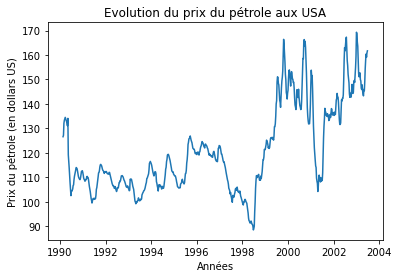

In [6]:
plt.plot(gas['time'], gas['value'])
plt.title('Evolution du prix du pétrole aux USA')
plt.xlabel('Années')
plt.ylabel('Prix du pétrole (en dollars US)')
plt.show()

## Histogramme ou diagramme en bâton (histogram or barchart)

**But** : Représenter des modalités d'une variable discrète.

On considère le jeu de données `catdata.csv` vu lors des séances précédentes.  
On souhaite représenter à l'aide d'un histogramme les modalités de la variable 'hairpattern'.

In [7]:
cat = pd.read_csv('./catdata.csv', sep=';')
cat

,haircolor,hairpattern,sex,weight,age,foodtype
0,red,solid,female,4.6,12,other
1,black,tabby,female,5.5,6,dry
2,white,tabby,female,5.6,8,wet
3,red,tabby,female,6.1,5,dry
4,brown,solid,female,5.3,7,dry
...,...,...,...,...,...,...
148,brown,tabby,female,6.3,3,dry
149,black,tabby,female,5.2,5,wet
150,brown,tabby,female,4.3,3,other
151,red,tabby,male,3.8,4,wet


Pour rappel, le nombre de sous-groupes associés à la variable "haipattern" est :

In [8]:
g = cat.groupby('hairpattern')
print('Il y a', np.shape(g)[0], 'sous-groupes distincts')

Il y a 5 sous-groupes distincts


### Création d'un histogramme simple

Le tracé d'un histogramme se fait avec la fonction `hist()` de matplotlib.

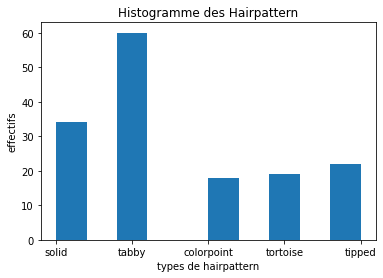

In [9]:
plt.hist(cat['hairpattern'])
plt.title('Histogramme des Hairpattern')
plt.xlabel('types de hairpattern')
plt.ylabel('effectifs')
plt.show()

### Création de plusieurs histogrammes dans une même figure

A l'intérieur d'une fenêtre ou d'un espace graphique notebook, il est possible d'insérer plusieurs graphiques en les plaçant dans un quadrillage. Pour cela on utilise la fonction `subplot()`. Cette dernière renvoie un tuple contenant deux objets, que l'on nomme communément `fig` et `ax` :
* `fig` représente l'objet figure dans lequel on viendra tracer des courbes 
* `ax` tuple contenant les différents graphiques que l'on souhaite créer (ils seront crées par la suite)

Les arguments de la fonction `subplots()` permettent de définir le quadrillage dans lequel seront tracés les graphiques:
* `nrows=` : nombre de lignes dans le quadrillage de graphiques
* `ncols=` : nombre de colonnes dans le quadrillage de graphiques
* `figsize=` : taille de la figure globale (taille du quadrillage)

On peut insérer un titre général en haut du quadrillage avec la fonction `suptitle()` et un titre pour chacun des sous graphiques du quadrillage avec la fonction `set_title()`.

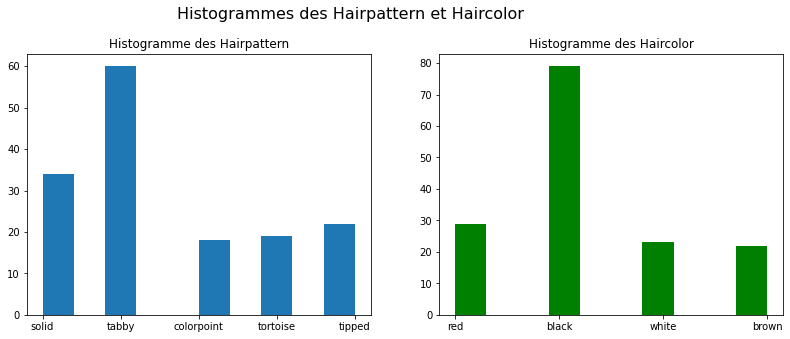

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.suptitle('Histogrammes des Hairpattern et Haircolor', fontsize=16)
ax1.hist(cat['hairpattern'])
ax2.hist(cat['haircolor'], color='green')
ax1.set_title('Histogramme des Hairpattern')
ax2.set_title('Histogramme des Haircolor')
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.85) # ajuster la position et l'espacement des graphes
plt.show()

### Création de diagrammes en bâtons (empilés ou côte-à-côte)

#### Diagrammes en bâtons empilés

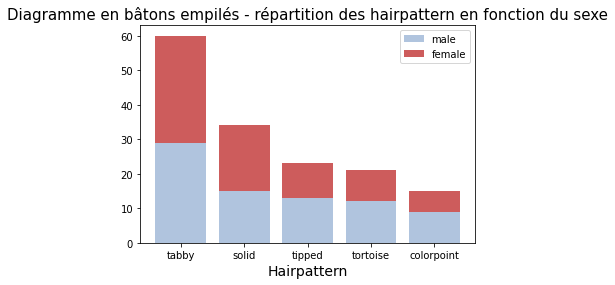

In [12]:
# Création du groupe "sex", et décompte des individus de chaque sous-grouê (male, female)
g = cat.groupby('sex')
c_female = g.get_group('female')['hairpattern'].value_counts()
c_male = g.get_group('male')['hairpattern'].value_counts()

# On extrait les noms des différents hairpattern et des différents sexes
hairpat = cat['hairpattern'].value_counts().index
gender = cat['sex'].value_counts().index
pos = np.arange(len(hairpat))

# Création du diagramme en bâtons empilés
plt.bar(pos, c_male,color='lightsteelblue')
plt.bar(pos, c_female,color='IndianRed', bottom=c_male) # bâtons "male" en-dessous des bâtons "female"
plt.xticks(pos, hairpat)
plt.xlabel('Hairpattern', fontsize=14)
plt.title('Diagramme en bâtons empilés - répartition des hairpattern en fonction du sexe',fontsize=15)
plt.legend(gender,loc=1) # loc=1 ==> légende placée dans le coin n°1, cad en haut à droite.
plt.show()

#### Diagrammes en bâtons côte-à-côte

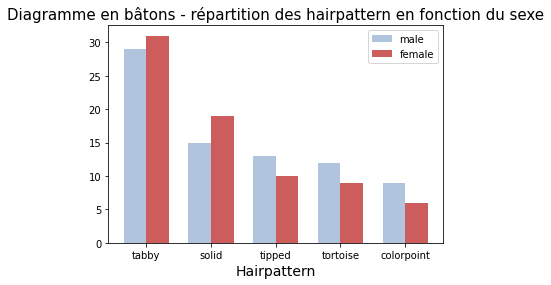

In [13]:
# Création du groupe "sex", et décompte des individus de chaque sous-grouê (male, female)
g = cat.groupby('sex')
c_female = g.get_group('female')['hairpattern'].value_counts()
c_male = g.get_group('male')['hairpattern'].value_counts()

# On extrait les noms des différents hairpattern et des différents sexes
hairpat = cat['hairpattern'].value_counts().index
gender = cat['sex'].value_counts().index
pos = np.arange(len(hairpat))
width = 0.35  # épaisseur de chaque bâton

# Création du diagramme en bâtons (bâtons côte à côte)
plt.bar(pos - width/2, c_male, width, color='lightsteelblue')
plt.bar(pos + width/2,c_female, width, color='IndianRed')
plt.xticks(pos, hairpat)
plt.xlabel('Hairpattern', fontsize=14)
plt.title('Diagramme en bâtons - répartition des hairpattern en fonction du sexe',fontsize=15)
plt.legend(gender,loc=1)
plt.show()

## Diagramme circulaire (pie chart)

**But** : Représenter les proportions des modalités d'une variable discrète.

Considérons ici à nouveau le jeu de données `catdata.csv`.  
On souhaite représenter dans un diagramme circulaire la proportion des différents *hair patterns*.  
Cette quantité n'est pas directement disponible dans le dataframe d'origine. Mais il suffit d'utiliser la fonction `value_counts` :

In [14]:
proportion_pattern = cat['hairpattern'].value_counts() 
proportion_pattern # la variable proportion_pattern est ici une Pandas Series 

tabby         60
solid         34
tipped        22
tortoise      19
colorpoint    18
Name: hairpattern, dtype: int64

On extrait les noms des différents type de *hair patterns*. Ils correspondent aux lignes (`index`) de la série 'proportion_pattern' créée précédemment.

In [15]:
labels = proportion_pattern.index
labels

Index(['tabby', 'solid', 'tipped', 'tortoise', 'colorpoint'], dtype='object')

Le diagramme circulaire se trace à l'aide de la fonction `pie` de matplotlib. On peut citer quelques options de base comme :
* `labels` : les étiquettes données à chaque part du diagramme
* `startangle` : angle qui marque le début du diagramme

La ligne `ax.axis('equal')` permet d'assurer que la forme finale du diagramme sera bien un cercle et non une ellipse.

*Remarque* : Le diagramme tourne dans le sens contraire des aiguilles d'une montre (ici il commence donc par 'Tabby' puis 'Solid', etc ... jusqu'à 'Colorpoint').

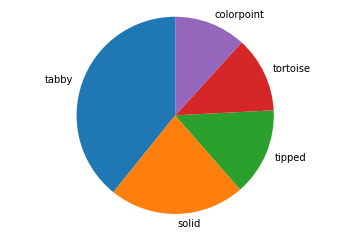

In [16]:
fig, ax = plt.subplots()
ax.pie(proportion_pattern, labels=labels, startangle=90)
ax.axis('equal')
plt.show()

Il est possible de tracer des diagrammes circulaires un peu plus sophistiqués avec les options suivantes :
* `explode` : permet d'extraire une ou plusieurs des parts du diagramme pour les mettre en valeur. La valeur à donner à cet argument optionnel est un tuple indiquant la distance de chaque part du diagramme par rapport au centre.
* `autopct` : permet d'afficher la valeur de la proportion de chaque modalité. La valeur à donner à cet argument optionnel est le format d'affichage.
* `shadow` (=True ou False) : affiche une ombre projetée

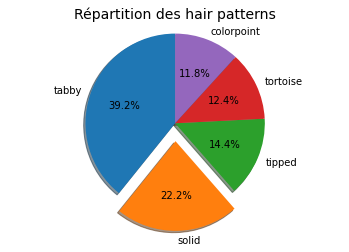

In [17]:
explode = (0, 0.2, 0, 0, 0)  # on isole seulement la deuxième part (c.a.d 'solid')

fig, ax = plt.subplots()
ax.pie(proportion_pattern, labels=labels, explode=explode, 
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Répartition des hair patterns', fontsize=14)
plt.show()

## Nuages de points (scatter plots)

**But** : Représenter la relation entre deux variables continues.

On considère le jeu de données `mtcars.csv` vu lors des séances précédentes.  
On souhaite représenter à l'aide d'un nuage de points la variable 'Qsec' (temps pour atteidre le quart de miles) en fonction de la variable 'wt' (poids de la voiture).

In [18]:
cars = pd.read_csv('./mtcars.csv')
cars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


Un nuage de points se trace à l'aide de la fonction `scatter` de matplotlib. Il est possible de spécifier les options suivantes :
* `marker` : le type de symboles utilisés pour représenter le nuage de points (par défaut : marker='o', un point)
* `color` : la couleur des symboles (par défaut : color=blue)
* `s`: la taille des symboles (par défaut : s=20) 

$\underline{\it{Remarque}}$ : Pour plus d'options et de détails sur la construction d'un nuage de points on pourra se référer à : http://www.python-simple.com/python-matplotlib/scatterplot.php

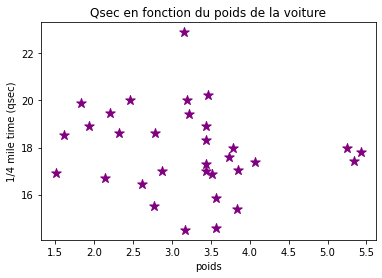

In [19]:
plt.scatter(cars['wt'], cars['qsec'], color='purple', s=100, marker='*')
plt.title('Qsec en fonction du poids de la voiture')
plt.xlabel('poids')
plt.ylabel('1/4 mile time (qsec)')
plt.show()

## Diagramme en boîte (box plot)

**But** : Le diagramme en boîte (aussi appelé boîte à moustaches) résume graphiquement les caractéristiques statistiques principales (médiane, quartiles, minimum, maximum ou déciles) d'une variable continue.

**Rappel** : Le *quartile* est calculé en tant que 4-quantiles :

* le 1er quartile est la donnée de la série qui sépare les 25 % inférieurs des données
* le 2e quartile est la donnée de la série qui sépare la série en deux parties (50 %) de la série. il est également appelé médiane
* le 3e quartile est la donnée de la série qui sépare les 25 % supérieurs des données.


On considère le jeu de donneés `catdata.csv`.  
On souhaite représenter les caractéristiques principales de la variable 'age' pour chaque type de 'hairpattern'.  
Pour tracer un diagramme en boîte on peut utiliser la fonction `boxplot` de `matplotlib`, mais dans le cas où on manipule des dataframes (comme dans le cadre de ce cours), on pourra utiliser la fonction `boxplot` de `pandas` (ie pandas.DataFrame.boxplot) : le tracé du diagramme en boîte sera alors bien plus simple et se fera en 1 ou 2 lignes.  

On applique donc la fonction `boxplot` directement à notre dataframe pandas. Les arguments principaux à donner sont :
* `column` : colonne du dataframe dont on souhaite connaître les caractéristiques statistiques. Ici colomn='age'.
* `by` : colonne du dataframe par rapport à laquelle on souhaite faire un group_by (ici by='hairpattern')

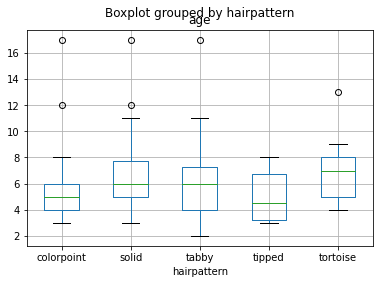

In [20]:
axes = cat.boxplot(column='age', by='hairpattern')

$\rightarrow$ Chaque boîte donne les limites du premier et dernier **quartile** d'âge, la barre du milieu donne la **médiane**, les moustaches vont jusqu'à la **valeur** la plus **extrême** dans la limite de 1.5 fois la hauteur de la boîte, et les points au-delà des moustaches sont représentés par des points isolés.

Pour supprimer le titre automatique "Boxplot grouped by hairpattern", on peut ajouter la ligne `plt.suptitle("")` :

Text(0.5, 0.98, '')

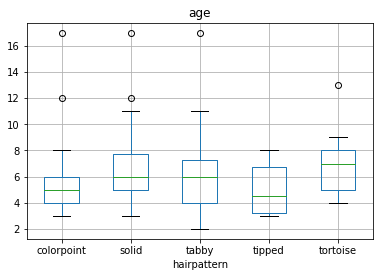

In [21]:
axes = cat.boxplot(column='age', by='hairpattern')
plt.suptitle("")

Si on omet de spécifier la variable `column`, alors une figure à quadrillage sera automatiquement créée et chaque case du quadrillage sera complétée par un diagramme en boîte correspondant à chacune des variables quantitatives du dataframe :

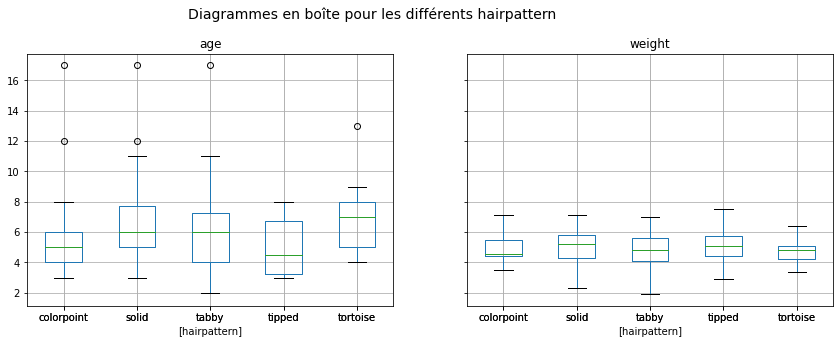

In [22]:
cat.boxplot(by='hairpattern', figsize=(16,5))
plt.suptitle("Diagrammes en boîte pour les différents hairpattern", fontsize=14)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.85)

## Mise en page, personnalisation des graphiques

Voici une liste non exhaustive de liens de référence pour la création et la customisation de graphiques :

* **ensemble des graphes réalisables avec matplotlib** : https://matplotlib.org/gallery/index.html
* **ajout de texte sur un graphique** : http://www.python-simple.com/python-matplotlib/ajout-text.php
* **liste des couleurs possibles pour les graphes** : https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py